<a href="https://colab.research.google.com/github/BarbosaRicardo/Assignment-1/blob/master/analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preparation
##### Import all of the necessary libraries and the file has been loaded from Github

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Read csv file

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/BarbosaRicardo/iot-lab1/main/iot_telemetry_data%202.csv")
df.head()


,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


Dropped columns with NaN 

In [4]:
df = df.dropna('columns') # drop columns with NaN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


Inspected the data using info() to look at the dataframe columns and types 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   lpg       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB


Replaced the timestamp with a more readable condition

In [6]:
df['time_stamp'] = pd.to_datetime(df['ts'], unit='s')
df.drop(columns=['ts'], inplace=True) 
df.head()

,device,co,humidity,light,lpg,motion,smoke,temp,time_stamp
0,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000,2020-07-12 00:01:34.385974528
1,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,2020-07-12 00:01:34.735567616
2,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,2020-07-12 00:01:38.073572864
3,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,2020-07-12 00:01:39.589145856
4,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000,2020-07-12 00:01:41.761234944


Inspected the data with a heatmap to see correlations with feature columns

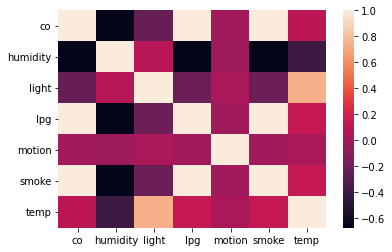

In [7]:
sns.heatmap(df.corr()) 

Utilized one hot encoding to simplify the names of the devices being used. 

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder=LabelEncoder()
Devices = labelencoder.fit_transform(df['device'])
Light = labelencoder.fit_transform(df['light'])
Motion = labelencoder.fit_transform(df['motion'])

onehotencoder=OneHotEncoder()

In [9]:
df['device'] = Devices
df['light'] = Light
df['motion'] = Motion
df

,device,co,humidity,light,lpg,motion,smoke,temp,time_stamp
0,2,0.004956,51.000000,0,0.007651,0,0.020411,22.700000,2020-07-12 00:01:34.385974528
1,0,0.002840,76.000000,0,0.005114,0,0.013275,19.700001,2020-07-12 00:01:34.735567616
2,2,0.004976,50.900000,0,0.007673,0,0.020475,22.600000,2020-07-12 00:01:38.073572864
3,1,0.004403,76.800003,1,0.007023,0,0.018628,27.000000,2020-07-12 00:01:39.589145856
4,2,0.004967,50.900000,0,0.007664,0,0.020448,22.600000,2020-07-12 00:01:41.761234944
...,...,...,...,...,...,...,...,...,...
405179,0,0.003745,75.300003,0,0.006247,0,0.016437,19.200001,2020-07-20 00:03:33.162014976
405180,2,0.005882,48.500000,0,0.008660,0,0.023301,22.200000,2020-07-20 00:03:33.576560640
405181,1,0.004540,75.699997,1,0.007181,0,0.019076,26.600000,2020-07-20 00:03:36.167959296
405182,0,0.003745,75.300003,0,0.006247,0,0.016437,19.200001,2020-07-20 00:03:36.979521536


Double checked values to see if any have null values 

In [10]:
df.isnull().sum()

device        0
co            0
humidity      0
light         0
lpg           0
motion        0
smoke         0
temp          0
time_stamp    0
dtype: int64

Converted celsius to Fahrenheit for easier readability. 

In [11]:
df['temp'] = (df['temp'] * 1.8) + 32
df

,device,co,humidity,light,lpg,motion,smoke,temp,time_stamp
0,2,0.004956,51.000000,0,0.007651,0,0.020411,72.860000,2020-07-12 00:01:34.385974528
1,0,0.002840,76.000000,0,0.005114,0,0.013275,67.460001,2020-07-12 00:01:34.735567616
2,2,0.004976,50.900000,0,0.007673,0,0.020475,72.680000,2020-07-12 00:01:38.073572864
3,1,0.004403,76.800003,1,0.007023,0,0.018628,80.600000,2020-07-12 00:01:39.589145856
4,2,0.004967,50.900000,0,0.007664,0,0.020448,72.680000,2020-07-12 00:01:41.761234944
...,...,...,...,...,...,...,...,...,...
405179,0,0.003745,75.300003,0,0.006247,0,0.016437,66.560001,2020-07-20 00:03:33.162014976
405180,2,0.005882,48.500000,0,0.008660,0,0.023301,71.960000,2020-07-20 00:03:33.576560640
405181,1,0.004540,75.699997,1,0.007181,0,0.019076,79.880001,2020-07-20 00:03:36.167959296
405182,0,0.003745,75.300003,0,0.006247,0,0.016437,66.560001,2020-07-20 00:03:36.979521536


Plotting the graphs 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd84f199350>,
      dtype=object)

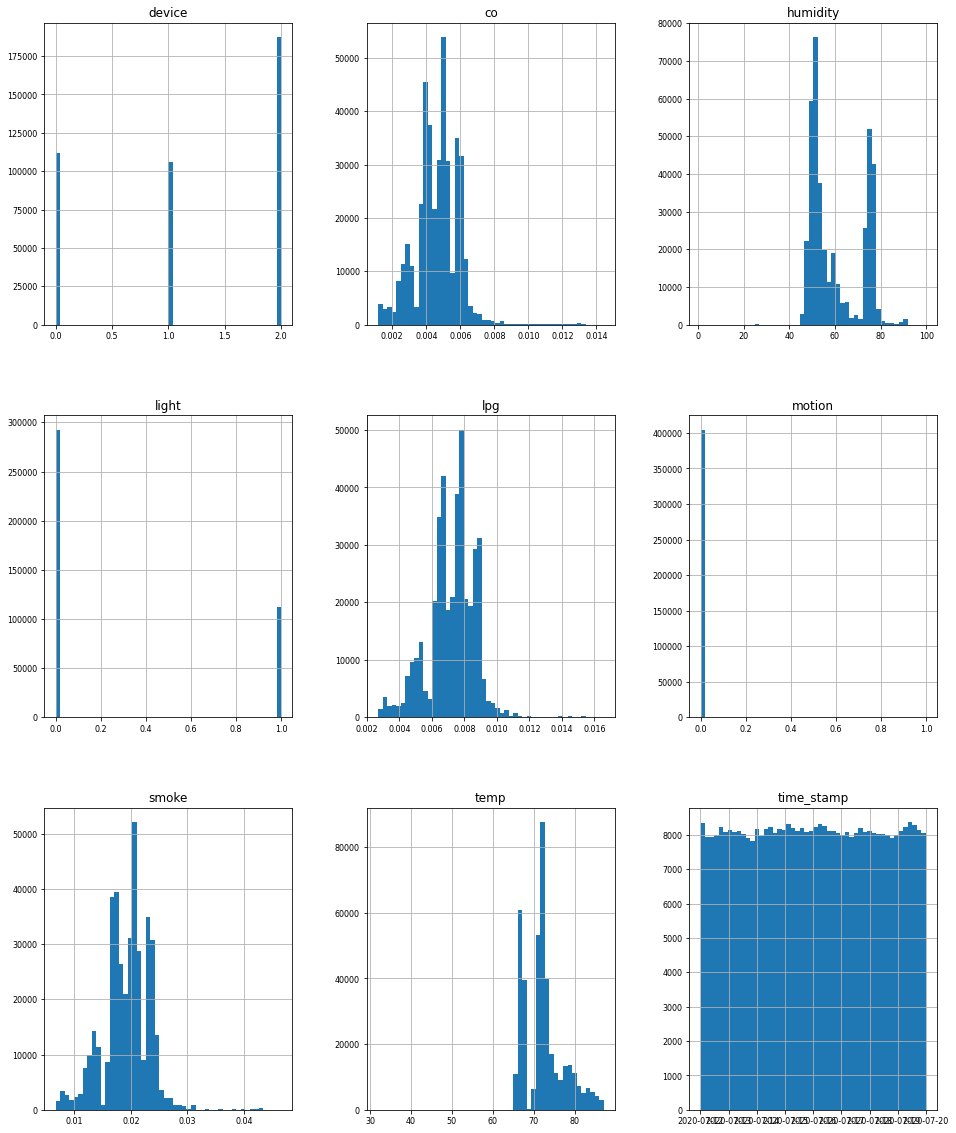

In [12]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

To find a correlation between carbon monoxide and smoke can be seen with a linear regression model. 

0.9964901267050843


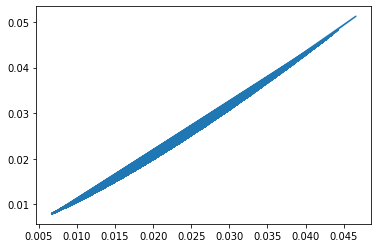

In [19]:
# Model to find the correlation between smoke and carbon monoxide 
X = df.drop(['time_stamp','device',"humidity","light", "lpg", "motion", "smoke", "temp"], axis=1)
x = df.drop(['time_stamp','device',"humidity","light", "lpg", "motion", "temp", "co"], axis=1)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = train_test_split(X, x, test_size=0.6, random_state=0)
Linear = LinearRegression()
Linear.fit(X_train, Y_train)
print(Linear.score(X_train, Y_train))
y_pred = Linear.predict(X_test)
plt.plot(Y_test, y_pred)
plt.show()

Find a correlation between carbon monoxide and liquid petroleum gas using a linear regression model 

0.9948159934072724


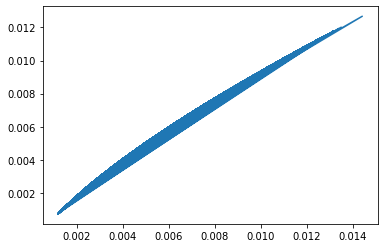

In [20]:
# Model to find the correlation between carbon monoxide and liquid petroleum gas 
X = df.drop(['time_stamp','device',"humidity","light", "motion", "smoke", "temp", "co"], axis=1)
x = df.drop(['time_stamp','device',"humidity","light", "lpg", "motion", "temp", "smoke"], axis=1)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = train_test_split(X, x, test_size=0.6, random_state=0)
Linear = LinearRegression()
Linear.fit(X_train, Y_train)
print(Linear.score(X_train, Y_train))
y_pred = Linear.predict(X_test)
plt.plot(Y_test, y_pred)
plt.show()

The correlation between smoke and liquid petroleum gas is very strong. 

0.9998359907646402


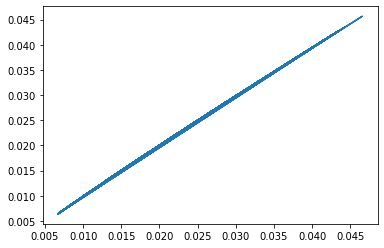

In [24]:
# Model to find the correlation between smoke and liquid petroleum gas 
X = df.drop(['time_stamp','device',"humidity","light", "motion", "smoke", "temp", "co"], axis=1)
x = df.drop(['time_stamp','device',"humidity","light", "lpg", "motion", "temp", "co"], axis=1)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = train_test_split(X, x, test_size=0.6, random_state=0)
Linear = LinearRegression()
Linear.fit(X_train, Y_train)
print(Linear.score(X_train, Y_train))
y_pred = Linear.predict(X_test)
plt.plot(Y_test, y_pred)
plt.show()

Liquid petroleum gas is a mixture of hydrocarbon gases that mostly constitute of propane, butane and propelyne. Based on the heatmap in the previous section above, one can match the color of the heat map and determine which features could be correlated with one another. As demonstrated in the linear regression models above, the heat map is fairly accurate to say that there is a correlation to smoke and carbon monoxide, carbon monoxide and liquid petroleum gas, and smoke and petroleum gas. 

Liquified petroleum gas is a pollutant that can cause cardiopulmonary diseases. Lpg is known to produce a biomass fuel smoke that contains risk factors for disease. Fuel smoke has been estimated to be responsible for oever 4.3 million deaths in 2012. Chronic bronchitis, COPD, lung cancer, childhood pneumonia, among many other cardio and pulmonory illnesses. 

Carbon monoxide is a leading factor of pulmonary. illnesses, and higher concentrations has been proven to cause lung diseases. There is a high correlation between carbon monoxide and liquified petroleum gas. Smoke and carbon monoxide as a given. However, a linear regression model can show this clearly. 